## Explore the relationship between gender/age and phone brand/device model

Use device_id to connect gender-age-train dataset and phone_brand_device_model dataset.

In [1]:
# imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

import sys
reload(sys)
sys.setdefaultencoding("utf-8")

import matplotlib.font_manager as fm
font = fm.FontProperties(fname='c:\\windows\\fonts\\simsun.ttc')

In [2]:
genderage = pd.read_csv('gender_age_train.csv')

phone = pd.read_csv('phone_brand_device_model.csv', encoding='utf-8')
phone2 = phone.drop_duplicates(['device_id'])

df_merge = pd.merge(genderage, phone2)

In [4]:
df_merge.head(10)

,device_id,gender,age,group,phone_brand,device_model
0,-8076087639492063270,M,35,M32-38,小米,MI 2
1,-2897161552818060146,M,35,M32-38,小米,MI 2
2,-8260683887967679142,M,35,M32-38,小米,MI 2
3,-4938849341048082022,M,30,M29-31,小米,红米note
4,245133531816851882,M,30,M29-31,小米,MI 3
5,-1297074871525174196,F,24,F24-26,OPPO,R1C
6,236877999787307864,M,36,M32-38,酷派,F2
7,-8098239495777311881,M,38,M32-38,小米,红米note
8,176515041953473526,M,33,M32-38,vivo,X3T
9,1596610250680140042,F,36,F33-42,三星,Galaxy S4


### Phone brand by gender groups 

In [6]:
popular_M = df_merge.phone_brand[df_merge.gender == 'M'].value_counts()
popular_M.sort_values(ascending = False, inplace = True)

popular_F = df_merge.phone_brand[df_merge.gender == 'F'].value_counts()
popular_F.sort_values(ascending = False, inplace = True)

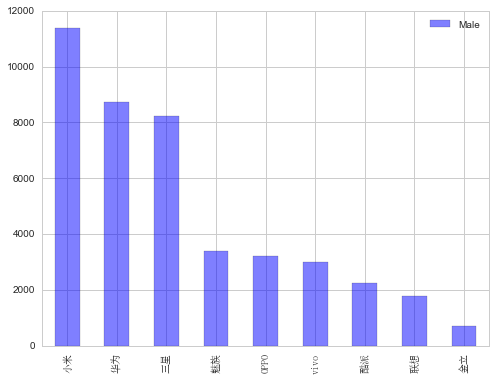

In [12]:
mpl.rcParams['figure.figsize'] = (8.0, 6.0)
plot1 = popular_M[0:9].plot(kind = 'bar', color = 'blue', alpha = 0.5, label = 'Male')
plot1.set_xticklabels(popular_M.index.str.decode('utf-8'), fontproperties = font)

plt.legend()

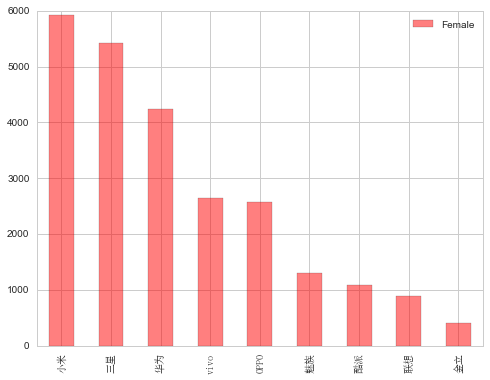

In [13]:
mpl.rcParams['figure.figsize'] = (8.0, 6.0)
plot2 = popular_F[0:9].plot(kind = 'bar', color = 'red', alpha = 0.5, label = 'Female')
plot2.set_xticklabels(popular_F.index.str.decode('utf-8'), fontproperties = font)
plt.legend()

The ranks of the top 10 brands used by males and females are slightly different.

### Phone brand by age groups

#### We can look at the age distribution of users for a particular brand, for example, the popular Xiaomi phones:

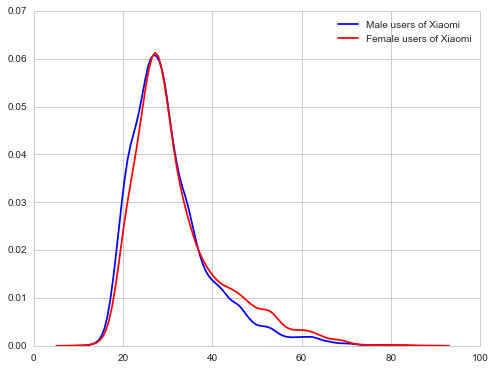

In [19]:
sns.kdeplot(df_merge.age[(df_merge.gender == 'M') & (df_merge.phone_brand == '小米')], color = 'blue', label = 'Male users of Xiaomi')
sns.kdeplot(df_merge.age[(df_merge.gender == 'F') & (df_merge.phone_brand == '小米')], color = 'red', label = 'Female users of Xiaomi')

plt.legend()

#### The Samsung users:

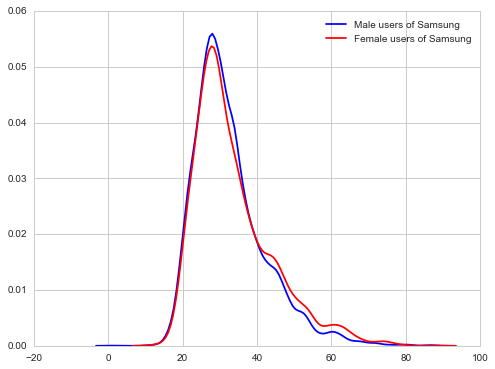

In [20]:
sns.kdeplot(df_merge.age[(df_merge.gender == 'M') & (df_merge.phone_brand == '三星')], color = 'blue', label = 'Male users of Samsung')
sns.kdeplot(df_merge.age[(df_merge.gender == 'F') & (df_merge.phone_brand == '三星')], color = 'red', label = 'Female users of Samsung')

plt.legend()

#### The Huawei users:

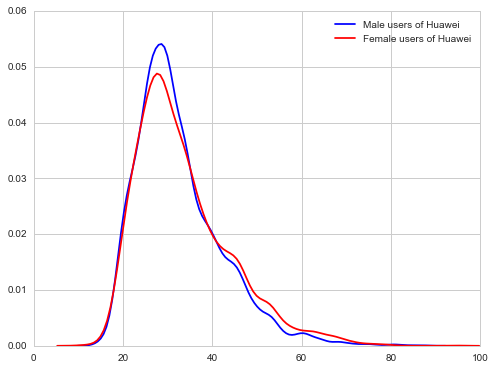

In [21]:
sns.kdeplot(df_merge.age[(df_merge.gender == 'M') & (df_merge.phone_brand == '华为')], color = 'blue', label = 'Male users of Huawei')
sns.kdeplot(df_merge.age[(df_merge.gender == 'F') & (df_merge.phone_brand == '华为')], color = 'red', label = 'Female users of Huawei')

plt.legend()

#### We can also look at the top 10 brands for male in two different age groups (under 22 and above 39), which we expect to be different:

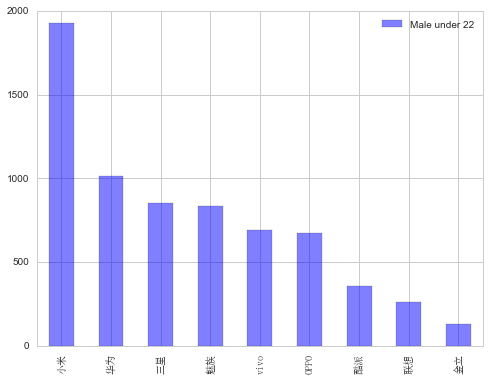

In [23]:
popular_M22 = df_merge.phone_brand[df_merge.group == 'M22-'].value_counts()
popular_M22.sort_values(ascending = False, inplace = True)

mpl.rcParams['figure.figsize'] = (8.0, 6.0)
plot1 = popular_M22[0:9].plot(kind = 'bar', color = 'blue', alpha = 0.5, label = 'Male under 22')
plot1.set_xticklabels(popular_M22.index.str.decode('utf-8'), fontproperties = font)

plt.legend()

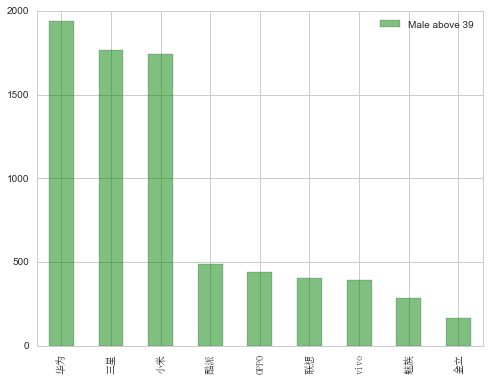

In [24]:
popular_M39 = df_merge.phone_brand[df_merge.group == 'M39+'].value_counts()
popular_M39.sort_values(ascending = False, inplace = True)

plot1 = popular_M39[0:9].plot(kind = 'bar', color = 'green', alpha = 0.5, label = 'Male above 39')
plot1.set_xticklabels(popular_M39.index.str.decode('utf-8'), fontproperties = font)

plt.legend()

The generally popular Huawei phones have almost twice as many older male users as younger male users. 

#### And what about Females?

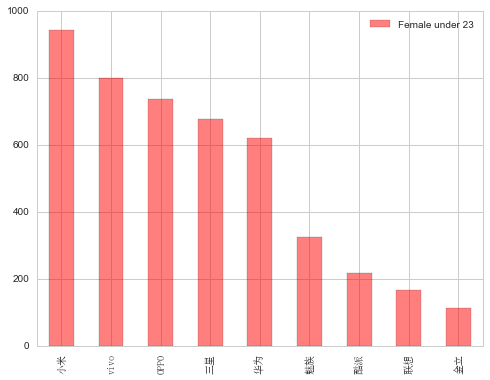

In [26]:
popular_F23 = df_merge.phone_brand[df_merge.group == 'F23-'].value_counts()
popular_F23.sort_values(ascending = False, inplace = True)

plot1 = popular_F23[0:9].plot(kind = 'bar', color = 'red', alpha = 0.5, label = 'Female under 23')
plot1.set_xticklabels(popular_F23.index.str.decode('utf-8'), fontproperties = font)

plt.legend()

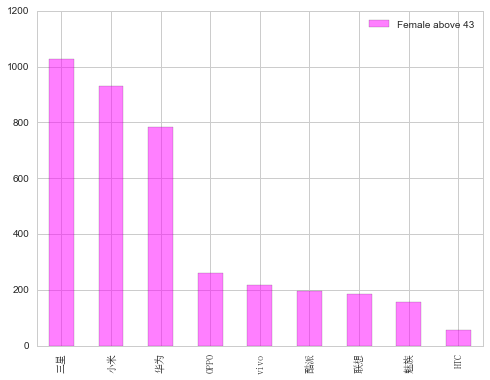

In [30]:
popular_F43 = df_merge.phone_brand[df_merge.group == 'F43+'].value_counts()
popular_F43.sort_values(ascending = False, inplace = True)

plot_F43 = popular_F43[0:9].plot(kind = 'bar', color = 'magenta', alpha = 0.5, label = 'Female above 43')
plot_F43.set_xticklabels(popular_F43.index.str.decode('utf-8'), fontproperties = font)

plt.legend()

So there are more female users for Samsung in the older age group. Younger females uses vivo and OPPO much more than older females. 

### Clearly, phone brand and device model are definitely important features to predict the age and gender of the users.